### Домашнее задание №5

In [3]:
import numpy as np
from math import factorial as fact
import matplotlib.pyplot as plt
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

**1.** Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [20]:
sectors = np.arange(0,37)
black = [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]
red = [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]

while True:
    enter = input('\nДля броска шарика нажмите Enter, для окончания игры - (s)top: ').strip().lower()
    if ('s' in enter) or ('stop' in enter):
        break
    else:
        attempt = np.random.choice(sectors)
        if attempt == 0:
            print('Зеро!')
        elif attempt in black:
            print(f'Черное {attempt}!')
        else:
            print(f'Красное {attempt}!')


Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Черное 20!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Черное 24!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Черное 33!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Красное 36!

Для броска шарика нажмите Enter, для окончания игры - (s)top: s


----------

**2.1.** Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [11]:
sectors = np.arange(0,37)
black = [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]
red = [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]

prev_color = None

while True:
    enter = input('\nДля броска шарика нажмите Enter, для окончания игры - (s)top: ').strip().lower()
    if ('s' in enter) or ('stop' in enter):
        break
    else:
        attempt = np.random.choice(sectors)
        if attempt == 0:
            print('Зеро!')
            
            if prev_color == 'zero':
                repeat_count += 1
                probab_mult *= 1/37
                print(f'\t{repeat_count} зеро подряд! Вероятность этого: {probab_mult}')
            else:
                probab_mult = 1/37
                repeat_count = 1
                prev_color = 'zero'
        elif attempt in black:
            print(f'Черное {attempt}!')
            
            if prev_color == 'black':
                repeat_count += 1
                probab_mult *= 18/37
                print(f'\t{repeat_count} черных подряд! Вероятность этого: {probab_mult}')
            else:
                probab_mult = 18/37
                repeat_count = 1
                prev_color = 'black'
        else:
            print(f'Красное {attempt}!')
            
            if prev_color == 'red':
                repeat_count += 1
                probab_mult *= 18/37
                print(f'\t{repeat_count} красных подряд! Вероятность этого: {probab_mult}')
            else:
                probab_mult = 18/37
                repeat_count = 1
                prev_color = 'red'


Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Черное 17!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Красное 19!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Черное 35!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Черное 13!
	2 черных подряд! Вероятность этого: 0.23666910153396642

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Красное 19!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Черное 11!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Красное 5!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Красное 14!
	2 красных подряд! Вероятность этого: 0.23666910153396642

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Черное 31!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Красное 36!

Для броска шарика нажмите Enter, для окончания игры - (s)top: 
Красное 23!
	2 красных подряд! Вероятность этого: 0.236669101533966

**2.2.** Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

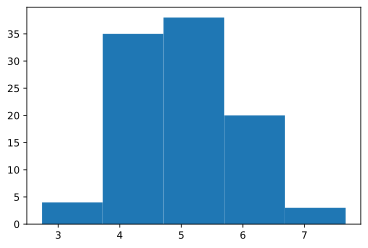

In [69]:
x = [np.random.rand(100) for _ in range(10)]

x_sum = x[0]
for i in range(1,10):
    x_sum += x[i]
    
plt.hist(x_sum,5)
plt.show()

--------

**3.1.** Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

**И**

**3.2.** Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [1]:
def Cnk(n,k):
    return fact(n)/(fact(k)*fact(n-k))

def Pnk(n,k):
    return Cnk(n,k) * (1/2)**n

In [8]:
k, n = 0, 10

a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)

x = a + b + c + d

for i in range(0, n):
    if x[i] == 2:
        k = k + 1

print('Pnk: ', Pnk(n,k))
print('P42: ', Pnk(4,2))
        
print(a, b, c, d)
print(x)
print(k, n, k/n)

Pnk:  0.205078125
P42:  0.375
[0 0 0 0 0 1 1 0 0 1] [0 0 1 0 1 1 0 1 0 1] [1 1 0 1 1 0 0 1 0 1] [0 1 0 0 0 1 1 0 1 1]
[1 2 1 1 2 3 2 2 1 4]
4 10 0.4


In [10]:
Cnk(4,2), Cnk(12,5)

(6.0, 792.0)

In [9]:
Pnk(4,2), Pnk(10,3), Pnk(10,4)

(0.375, 0.1171875, 0.205078125)

----------

**4.** Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [95]:
for p in itertools.product("012",repeat=3):
    print(''.join(p))

000
001
002
010
011
012
020
021
022
100
101
102
110
111
112
120
121
122
200
201
202
210
211
212
220
221
222


In [101]:
for p in itertools.permutations("abc",3):
    print(''.join(str(x) for x in p))

abc
acb
bac
bca
cab
cba


In [99]:
for p in itertools.combinations("012345",2):
    print(''.join(p))

01
02
03
04
05
12
13
14
15
23
24
25
34
35
45


----------

**5.** Дополните код расчетом коэффициента корреляции x и y

0.7304122419833672 0.12970164691018574
0.7304122419833673 0.1297016469101856


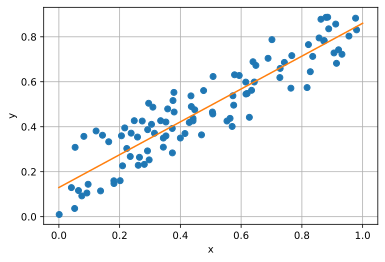

Коэф. корреляции: 0.9193034705581627 (проверка: 0.9193034705581624)


In [125]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

# вычисление коэф. корреляции:
xm = np.mean(x)
ym = np.mean(y)
R = np.sum((x-xm)*(y-ym))/np.sqrt(np.sum((x-xm)**2) * np.sum((y-ym)**2))

print(f'Коэф. корреляции: {R} (проверка: {np.corrcoef(x,y)[0,1]})')